In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("ecommerce_transactions.xlsx")

In [4]:
# 1. Aperçu
display(df.head())

,Transaction ID,Date,Client ID,Pays,Catégorie,Marque,Quantité,Prix unitaire (€),Méthode de paiement,Note client,Montant total (€)
0,b90c55bf-2a79-431c-bc11-c1b8e764f780,2024-03-27,2b9afa4c-e1ab-4d05-810c-e2342c26bffa,Gambia,Livres,accept,2,41.20,PayPal,4.0,82.40
1,d364d102-0604-4061-b0d2-aeb7d4495504,2024-05-31,91acae16-626a-4082-8879-fbe94b170368,Madagascar,Maison,quite,3,354.36,PayPal,3.0,1063.08
2,cfbcc1ff-8eb9-4349-bfee-c845793aec38,2025-01-02,009f5919-2d4f-4119-8a52-a624fe383028,Samoa,Vêtements,stock,5,449.46,Cryptomonnaie,2.0,2247.30
3,5fa27823-888d-42c4-b669-89339e2834fe,2024-08-01,2fb01dc7-37de-4c69-95ce-e3a4ee1e34b6,El Salvador,Électronique,garden,2,136.41,PayPal,3.0,272.82
4,ea5fe267-5877-4d3a-a8b5-a07a9659a673,2024-08-06,2e53eaca-a1d5-4eee-9819-3913d296bf01,Cyprus,Maison,song,4,155.17,Cryptomonnaie,2.0,620.68


In [5]:
# 2. Dimensions
print(df.shape)
print(df.dtypes)

(10000, 11)
Transaction ID                 object
Date                   datetime64[ns]
Client ID                      object
Pays                           object
Catégorie                      object
Marque                         object
Quantité                        int64
Prix unitaire (€)             float64
Méthode de paiement            object
Note client                   float64
Montant total (€)             float64
dtype: object


In [6]:
# 3. Valeurs manquantes
print(df.isna().sum())

Transaction ID           0
Date                     0
Client ID                0
Pays                     0
Catégorie                0
Marque                   0
Quantité                 0
Prix unitaire (€)        0
Méthode de paiement      0
Note client            486
Montant total (€)        0
dtype: int64


In [7]:
# 4. Supprimer les doublons
df = df.drop_duplicates()

In [8]:
# 5. Ajouter colonne Année-Mois
df['Date'] = pd.to_datetime(df['Date'])
df['Année-Mois'] = df['Date'].dt.to_period('M')

In [ ]:
# 6. CA par pays (top 5)
df.groupby('Pays')['Montant total (€)'].sum().sort_values(ascending=False).head(5)

Pays
Congo                               62651.57
Korea                               56505.16
Bouvet Island (Bouvetoya)           51194.43
Saint Vincent and the Grenadines    47342.95
Guinea                              45917.90
Name: Montant total (€), dtype: float64

In [7]:
# 7. CA par catégorie
print(df.groupby('Catégorie')['Montant total (€)'].sum())

Catégorie
Beauté          1088611.50
Jouets          1077596.12
Livres          1095512.08
Maison          1129628.11
Sport           1085520.34
Vêtements       1039763.06
Électronique    1089970.04
Name: Montant total (€), dtype: float64


In [8]:
# 8. Marques les plus vendues (quantité max par catégorie)
top_marques = df.groupby(['Catégorie', 'Marque'])['Quantité'].sum()
print(top_marques.groupby(level=0).idxmax())

Catégorie
Beauté              (Beauté, station)
Jouets               (Jouets, author)
Livres               (Livres, former)
Maison                (Maison, would)
Sport                  (Sport, order)
Vêtements         (Vêtements, future)
Électronique    (Électronique, group)
Name: Quantité, dtype: object


In [9]:
# 9. Méthodes de paiement les plus utilisées par pays
print(df.groupby(['Pays', 'Méthode de paiement']).size().groupby(level=0).idxmax())

Pays
Afghanistan                     (Afghanistan, PayPal)
Albania                             (Albania, PayPal)
Algeria                     (Algeria, Carte bancaire)
American Samoa       (American Samoa, Carte bancaire)
Andorra                           (Andorra, Virement)
                                   ...               
Wallis and Futuna       (Wallis and Futuna, Virement)
Western Sahara               (Western Sahara, PayPal)
Yemen                          (Yemen, Cryptomonnaie)
Zambia                               (Zambia, PayPal)
Zimbabwe                         (Zimbabwe, Virement)
Length: 243, dtype: object


In [10]:
# 10. Dépense moyenne par client et top 10
depense_client = df.groupby('Client ID')['Montant total (€)'].sum()
print(depense_client.sort_values(ascending=False).head(10))

Client ID
54dd8f81-9694-4b08-9ec3-b9b1ce7c71dd    2499.30
57ac7dde-87ab-4bc6-b1c9-8ef1f50043f2    2499.15
ac37e848-e0b4-4b99-bd1d-545d3ae6e2a4    2498.85
2d0f2807-6e64-47d6-89ca-c453497be584    2498.75
6125eb8b-7eec-4a21-852a-5251693005a5    2498.50
3e70243c-dc08-456c-a73f-81d1c6e2a508    2497.30
f442ea40-3616-496c-abce-d55afda46d7d    2495.95
cf00aa12-decc-41fa-baa5-4f28c45a95a5    2494.70
56aeeaa9-bbaa-400e-b685-20292ed23167    2492.65
6408b7f1-59a8-4d7c-811d-6fa2b800ff5c    2492.20
Name: Montant total (€), dtype: float64


In [11]:
# 11. Note moyenne par catégorie et pays
print(df.groupby(['Catégorie', 'Pays'])['Note client'].mean())

Catégorie     Pays             
Beauté        Afghanistan          3.000000
              Albania              2.333333
              Algeria              4.000000
              American Samoa       3.000000
              Andorra              3.000000
                                     ...   
Électronique  Wallis and Futuna    3.333333
              Western Sahara       3.800000
              Yemen                3.800000
              Zambia               4.333333
              Zimbabwe             3.500000
Name: Note client, Length: 1695, dtype: float64


In [12]:
# 12. Commandes avec note manquante
print(df[df['Note client'].isna()].groupby(['Catégorie', 'Pays']).size())

Catégorie     Pays             
Beauté        Azerbaijan           1
              Bahrain              1
              Bulgaria             1
              Chile                1
              Comoros              1
                                  ..
Électronique  Venezuela            1
              Vietnam              1
              Wallis and Futuna    1
              Yemen                1
              Zimbabwe             2
Length: 438, dtype: int64


In [13]:
# 13. Statistiques sur les montants totaux
mt = df['Montant total (€)']
print("Moyenne :", np.mean(mt))
print("Médiane :", np.median(mt))
print("Écart-type :", np.std(mt))
print("25e percentile :", np.percentile(mt, 25))
print("75e percentile :", np.percentile(mt, 75))

Moyenne : 760.660125
Médiane : 605.4749999999999
Écart-type : 595.9200987235239
25e percentile : 280.995
75e percentile : 1142.76


In [15]:
# 14. Colonne 'Client fidèle'
df['Client fidèle'] = df.groupby('Client ID')['Client ID'].transform('count') > 5

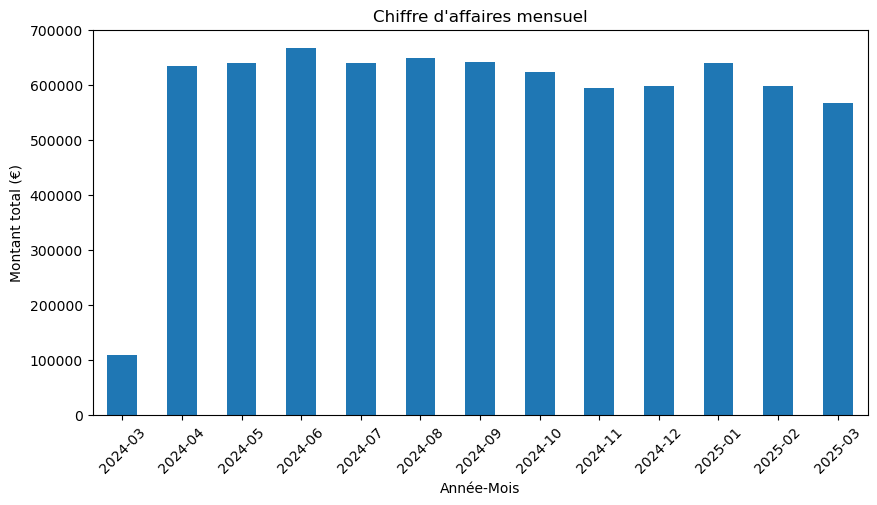

In [16]:
# 15. Barplot chiffre d’affaires mensuel
df['Date'] = pd.to_datetime(df['Date'])
df['Année-Mois'] = df['Date'].dt.to_period('M')
df.groupby('Année-Mois')['Montant total (€)'].sum().plot(kind='bar', figsize=(10,5))
plt.title("Chiffre d'affaires mensuel")
plt.ylabel("Montant total (€)")
plt.xticks(rotation=45)
plt.show()

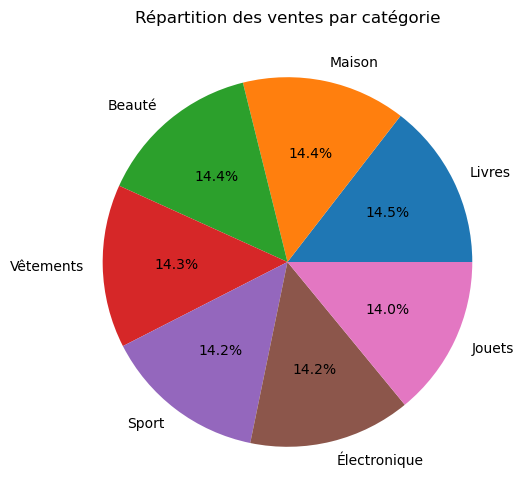

In [17]:
# 16. Pie chart des ventes par catégorie
df['Catégorie'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6))
plt.title("Répartition des ventes par catégorie")
plt.ylabel("")
plt.show()

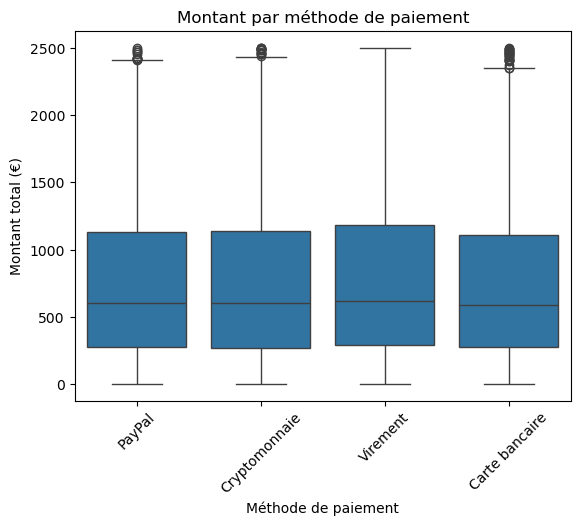

In [18]:
# 17. Boxplot des montants par méthode de paiement
sns.boxplot(x='Méthode de paiement', y='Montant total (€)', data=df)
plt.title("Montant par méthode de paiement")
plt.xticks(rotation=45)
plt.show()

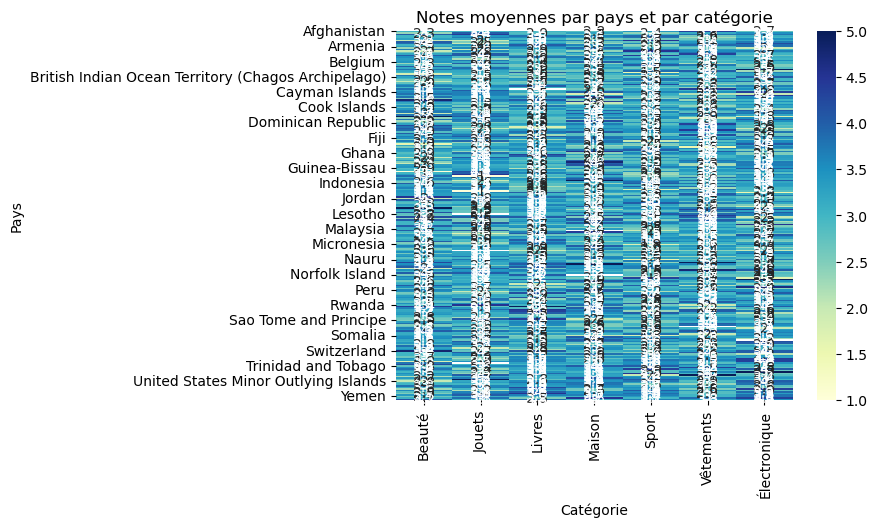

In [19]:
# 18. Heatmap des notes moyennes
heatmap_data = df.pivot_table(values='Note client', index='Pays', columns='Catégorie', aggfunc='mean')
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")
plt.title("Notes moyennes par pays et par catégorie")
plt.show()

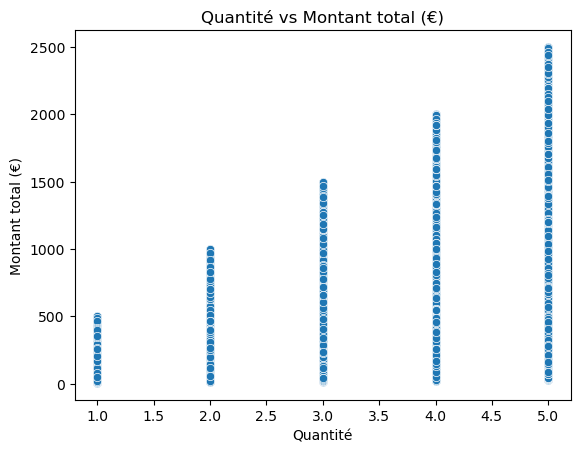

In [20]:
# 19. Scatter plot quantité vs montant
sns.scatterplot(x='Quantité', y='Montant total (€)', data=df)
plt.title("Quantité vs Montant total (€)")
plt.show()

In [21]:
# 20. Sauvegarder le DataFrame nettoyé
df.to_excel("ecommerce_transactions_clean.xlsx", index=False)